# **Trabajo 2: Agrupamiento de clientes corporativos de una empresa**

Los realizadores de este trabajo son:
 * Alejandro Ortiz Mejía
 * Mateo Restrepo Higuita
 * Julian Esteban Cadavid
 * Nicolás Laniado Valencia


###**Objetivo**: Entender mejor a los clientes de una empresa por medio de un agrupamiento de estos que permita identificar patrones de uso de productos y canales, y su relación con los estados financieros.

## **Materiales**

Para la realización de este estudio se cuenta con una base de datos de los clientes de la empresa que cuenta con 2233 datos. Los datos que se tienen de los clientes son los siguientes:

**Variables de comportamiento de los clientes en canales y productos**

* en_vm_canalX: valor del ticket promedio de entrada por el canal X
* sal_vm_canalX: valor del ticket promedio de salida por el canal X
* en_tx_canalX: cantidad de transacciones mensuales en promedio por el canal X

Las variables listadas a continuación tienen la estructura presentada anteriormente y son de tipo numérico:

- en_vm_canal1
- en_vm_canal2
- en_vm_canal3
- en_vm_canal4
- en_vm_canal5
- en_vm_canal6
- en_vm_canal7
- en_vm_canal8
- en_vm_canal9
- en_vm_canal10
- en_vm_otros

$~$

- en_tx_canal1
- en_tx_canal2
- en_tx_canal3
- en_tx_canal4
- en_tx_canal5
- en_tx_canal6
- en_tx_canal7
- en_tx_canal8
- en_tx_canal9
- en_tx_canal10
- en_tx_otros

$~$
- sal_vm_canal5
- sal_vm_canal2
- sal_vm_canal8
- sal_vm_otros
- sal_tx_canal5
- sal_tx_canal2
- sal_tx_canal8
- sal_tx_otros

$~$

**Variables de estados financieros y características de los clientes**

- impo_cv: [importaciones]/[compras] categorizadas
- expo_vt: [exportaciones]/[ventas] categorizadas
- cxp: [cuentas por pagar] categorizada con seis niveles
- cxc: [cuentas por cobrar] categorizada con seis niveles
- totalinventory: [valor de inventarios] categorizada con seis niveles
- pagos_pj: [pagos hechos a personas jurídicas]/[pagos totales]
- pagos_pn: [pagos hechos a personas naturales]/[pagos totales]
- tiene_ventas_fisicas: la empresa tiene puntos de venta físicos (1:Si, 0:No)
- tiene_ventas_electronicas: la empresa tiene ventas electrónicas (1:Si, 0:No)
- recaudos_pj: [recaudos provenientes de personas jurídicas]/[recaudos totales]
- recaudos_pn: [recaudos provenientes de personas naturales]/[recaudos totales]
- rotacion_inventarios: [rotación de inventarios en días] categorizada con seis niveles
- rotacion_cxc: [rotación de cuentas por pagar en días] categorizada con seis niveles
- rotacion_cxp: [rotación de cuentas por cobrar en días] categorizada con seis niveles
- ciclo_negocio: [ciclo de negocio en días] categorizada con seis niveles
- ciclo_financiero: [ciclo financiero en días] categorizada con seis niveles






## **Métodos**

1. Analisis descriptivo: se obtendrán las medidas de tendencia central y de dispersión de las variables.

2. Agrupamiento de los clientes de la empresa de acuerdo a las variables de comportamiento y de estados financieros: se usará el algoritmo de *K - Means* para realizar el agrupamiento. Se hará una selección de K número de grupos, de tal manera que estos sean interpretables.


## **Resultados**

Se importan las librerías necesarias para el algoritmo

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
import seaborn as sb
from sklearn import preprocessing, decomposition, pipeline, cluster, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances_argmin_min

Se carga la base de datos

In [ ]:
from google.colab import files
import io

df = pd.read_csv(io.BytesIO(files.upload()["base_trabajo_segmentacion.csv"]), sep=';')

df.head()

Saving base_trabajo_segmentacion.csv to base_trabajo_segmentacion (2).csv


,nit,en_vm_canal1,en_vm_canal2,en_vm_canal3,en_vm_canal4,en_vm_canal5,en_vm_canal6,en_vm_canal7,en_vm_canal8,en_vm_canal9,en_vm_canal10,en_vm_otros,en_tx_canal1,en_tx_canal2,en_tx_canal3,en_tx_canal4,en_tx_canal5,en_tx_canal6,en_tx_canal7,en_tx_canal8,en_tx_canal9,en_tx_canal10,en_tx_otros,sal_vm_canal5,sal_vm_canal2,sal_vm_canal8,sal_vm_otros,sal_tx_canal5,sal_tx_canal2,sal_tx_canal8,sal_tx_otros,impo_cv,expo_vt,cxp,cxc,totalinventory,pagos_pj,pagos_pn,tiene_ventas_fisicas,tiene_ventas_electronicas,recaudos_pj,recaudos_pn,rotacion_inventarios,rotacion_cxc,rotacion_cxp,ciclo_negocio,ciclo_financiero
0,C4936394968152386565,0.000000e+00,0.000000e+00,0.000000e+00,0.00,0.0,0.00,0.000000e+00,0.0,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.000000,0.000000,0.0,0.000000,1,1,6,6,6,0.000,0.000,0,0,0.0,0.0,6,2,2,5,6
1,C-8615176103348111575,0.000000e+00,0.000000e+00,0.000000e+00,0.00,0.0,0.00,0.000000e+00,0.0,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.000000,0.000000,0.0,0.000000,1,1,2,6,2,1.000,0.000,0,0,0.0,0.0,1,3,1,3,4
2,C2364605246729357060,2.509275e+08,5.416089e+07,5.122152e+06,41852510.17,413614314.7,1663236.40,2.106848e+09,0.0,0.00,0.0,0.0,24.416667,11.916667,3.333333,237.833333,2.545455,5.4,8.25,0.0,0.0,0.0,0.0,413614314.7,2.265361e+09,0.0,0.0,2.545455,613.083333,0.0,0.000000,1,1,3,1,2,0.456,0.544,1,0,0.0,0.0,2,1,2,2,1
3,C7393816976826597531,3.940236e+07,9.646900e+07,8.226710e+06,0.00,0.0,7072801.90,0.000000e+00,9000000.0,0.00,0.0,0.0,14.416667,13.833333,4.600000,0.000000,0.000000,2.8,0.00,1.0,0.0,0.0,0.0,0.0,6.055844e+07,0.0,0.0,0.000000,10.333333,0.0,0.000000,2,2,1,1,1,0.615,0.385,1,0,0.0,0.0,5,2,3,5,5
4,C872645851723947566,3.374323e+08,2.342179e+08,1.053441e+08,15755286.83,0.0,23671840.33,0.000000e+00,3600962.2,3727298.56,0.0,0.0,153.583333,42.250000,102.416667,49.333333,0.000000,18.0,0.00,2.2,4.0,0.0,0.0,0.0,0.000000e+00,0.0,622080714.3,0.000000,0.000000,0.0,53.416667,1,1,2,2,2,1.000,0.000,1,0,0.0,0.0,2,2,1,3,3


## **Pre procesamiento de los datos**

A continuación se realizan algunos pre procesamiento a los datos con el fin de que el algoritmo de agrupamiento funciona de manera óptima.

In [ ]:
print(f"El conjunto de datos tiene {df.shape[0]} filas y {df.shape[1]} columnas.")

El conjunto de datos tiene 2233 filas y 47 columnas.


Se verifica si en el conjunto de datos hay filas con datos faltantes.

In [ ]:
def calcular_numero_filas_incompletas(df):
  numero_filas_incompletas = df.isna().any(axis=1).sum()
  porcentaje_filas_incompletas = round((numero_filas_incompletas / df.shape[0]) * 100, 2)
  print(f"Hay {numero_filas_incompletas} filas con datos faltantes, es decir, el {porcentaje_filas_incompletas}% del total de filas del conjunto de datos.")
  
  
calcular_numero_filas_incompletas(df)

Hay 0 filas con datos faltantes, es decir, el 0.0% del total de filas del conjunto de datos.


Dado que la columna *nit* representa un identificador único, verificaremos si hay más de una fila con el mismo identificador

In [ ]:
numero_nit_duplicadas = df[['nit']].duplicated().sum()
print(f"Existen {numero_nit_duplicadas} valores de nit repetidos, que corresponden al {round((numero_nit_duplicadas / df.shape[0]) * 100, 2)} % del total de filas del conjunto de datos.")

Existen 26 valores de nit repetidos, que corresponden al 1.16 % del total de filas del conjunto de datos.


En efecto, hay 26 filas con el mismo *nit*.

Veamos ahora cuáles son los valores de *nit* duplicados.

In [ ]:
df['nit'][df[['nit']].duplicated()]

2207    C-183565186626737291
2208    C-183565186626737291
2209    C-183565186626737291
2210    C-183565186626737291
2211    C-183565186626737291
2212    C-183565186626737291
2213    C-183565186626737291
2214    C-183565186626737291
2215    C-183565186626737291
2216    C-183565186626737291
2217    C-183565186626737291
2218    C-183565186626737291
2219    C-183565186626737291
2220    C-183565186626737291
2221    C-183565186626737291
2222    C-183565186626737291
2223    C-183565186626737291
2224    C-183565186626737291
2225    C-183565186626737291
2226    C-183565186626737291
2227    C-183565186626737291
2228    C-183565186626737291
2229    C-183565186626737291
2230    C-183565186626737291
2231    C-183565186626737291
2232    C-183565186626737291
Name: nit, dtype: object

Observemos que solo hay un *nit* que se repite. Por tanto, se removerán las filas con este nit a excepción de la primera ocurrencia, ya que solo representa al 1.16 % de los datos, lo cual no es significativo, además, así se evita entorpecer al algoritmo.

In [ ]:
df = df.drop_duplicates(subset=['nit'])
print(f"El conjunto de datos tiene {df.shape[0]} filas y {df.shape[1]} columnas.")

El conjunto de datos tiene 2207 filas y 47 columnas.


De esta manera, nuestro conjunto de datos queda con 2207 filas y 47 columnas.

Una vez realizado este preprocesamiento, se crean las nuevas variables derivadas que servirán para realizar la segmentación de los clientes.

In [ ]:
# Total dinero movido en todos los canales
df['total_vm'] = df['en_vm_canal1'] + df['en_vm_canal2'] + df['en_vm_canal3'] + \
df['en_vm_canal4'] + df['en_vm_canal5'] + df['en_vm_canal6'] +\
df['en_vm_canal7'] + df['en_vm_canal8'] + df['en_vm_canal9'] +\
df['en_vm_canal10'] + df['en_vm_otros'] + df['sal_vm_canal5'] +\
df['sal_vm_canal2'] + df['sal_vm_canal8'] + df['sal_vm_otros']

# Porcentaje movido por el canal i del total de dinero movido
df['porc_vm_canal1'] = (df['en_vm_canal1'] / df['total_vm'])

df['porc_vm_canal2'] = (df['en_vm_canal2'] + df['sal_vm_canal2']) / df['total_vm']

df['porc_vm_canal3'] = (df['en_vm_canal3']) / df['total_vm']

df['porc_vm_canal4'] = (df['en_vm_canal4']) / df['total_vm']

df['porc_vm_canal5'] = (df['en_vm_canal5'] + df['sal_vm_canal5']) / df['total_vm']

df['porc_vm_canal6'] = (df['en_vm_canal6']) / df['total_vm']

df['porc_vm_canal7'] = (df['en_vm_canal7']) / df['total_vm']

df['porc_vm_canal8'] = (df['en_vm_canal8'] + df['sal_vm_canal8']) / df['total_vm']

df['porc_vm_canal9'] = (df['en_vm_canal9']) / df['total_vm']

df['porc_vm_canal10'] = (df['en_vm_canal10']) / df['total_vm']

df['porc_vm_otros'] = (df['en_vm_otros'] + df['sal_vm_otros']) / df['total_vm']

# Total transacciones realizadas
df['total_tx'] = df['en_tx_canal1'] + df['en_tx_canal2'] + df['en_tx_canal3'] +\
df['en_tx_canal4'] + df['en_tx_canal5'] + df['en_tx_canal6'] +\
df['en_tx_canal7'] + df['en_tx_canal8'] + df['en_tx_canal9'] +\
df['en_tx_canal10'] + df['en_tx_otros'] + df['sal_tx_canal5'] +\
df['sal_tx_canal2'] + df['sal_tx_canal8'] + df['sal_tx_otros']

# Porcentaje transacciones hechas por el canal i del total de transacciones hechas
df['porc_tx_canal1'] = (df['en_tx_canal1'] / df['total_tx'])

df['porc_tx_canal2'] = (df['en_tx_canal2'] + df['sal_tx_canal2']) / df['total_tx']

df['porc_tx_canal3'] = (df['en_tx_canal3']) / df['total_tx']

df['porc_tx_canal4'] = (df['en_tx_canal4']) / df['total_tx']

df['porc_tx_canal5'] = (df['en_tx_canal5'] + df['sal_tx_canal5']) / df['total_tx']

df['porc_tx_canal6'] = (df['en_tx_canal6']) / df['total_tx']

df['porc_tx_canal7'] = (df['en_tx_canal7']) / df['total_tx']

df['porc_tx_canal8'] = (df['en_tx_canal8'] + df['sal_tx_canal8']) / df['total_tx']

df['porc_tx_canal9'] = (df['en_tx_canal9']) / df['total_tx']

df['porc_tx_canal10'] = (df['en_tx_canal10']) / df['total_tx']

df['porc_tx_otros'] = (df['en_tx_otros'] + df['sal_tx_otros']) / df['total_tx']

# Para aquellas filas donde total_vm es 0, y por ende las variables anteriores 
# quedan con NaN, se llenan con 0.
df.fillna(value=0, inplace=True)

# Ranking de total dinero movido estandarizado entre 0 y 1
df['rank_total_vm'] = df['total_vm'].rank(pct=True)

# Ranking de total de transacciones hechas estandarizado entre 0 y 1
df['rank_total_tx'] = df['total_tx'].rank(pct=True)


In [ ]:
df.drop(['en_vm_canal1', 'en_vm_canal2', 'en_vm_canal3', 'en_vm_canal4',
    'en_vm_canal5', 'en_vm_canal6', 'en_vm_canal7', 'en_vm_canal8',
    'en_vm_canal9', 'en_vm_canal10', 'en_vm_otros', 'en_tx_canal1',
    'en_tx_canal2', 'en_tx_canal3', 'en_tx_canal4', 'en_tx_canal5',
    'en_tx_canal6', 'en_tx_canal7', 'en_tx_canal8', 'en_tx_canal9',
    'en_tx_canal10', 'en_tx_otros', 'sal_vm_canal5', 'sal_vm_canal2',
    'sal_vm_canal8', 'sal_vm_otros', 'sal_tx_canal5', 'sal_tx_canal2',
    'sal_tx_canal8', 'sal_tx_otros'], axis=1, inplace=True)

## **Análisis descriptivo**



**Variables numéricas**

En la siguiente tabla se presenta la cantidad de datos, la media, la desviación estándar, el valor mínimo, el primer cuartil, la mediana, el tercer cuartil y el máximo de cada variable de tipo numérica.

In [ ]:
df_numericas = df[[
    'porc_vm_canal1', 'porc_vm_canal2', 'porc_vm_canal3', 'porc_vm_canal4',
    'porc_vm_canal5', 'porc_vm_canal6', 'porc_vm_canal7', 'porc_vm_canal8',
    'porc_vm_canal9', 'porc_vm_canal10', 'porc_vm_otros', 'porc_tx_canal1',
    'porc_tx_canal2', 'porc_tx_canal3', 'porc_tx_canal4', 'porc_tx_canal5',
    'porc_tx_canal6', 'porc_tx_canal7', 'porc_tx_canal8', 'porc_tx_canal9',
    'porc_tx_canal10', 'porc_tx_otros', 'pagos_pj', 'pagos_pn',
    'recaudos_pj', 'recaudos_pn', 'total_vm', 'total_tx', 'rank_total_vm',
    'rank_total_tx'
    ]]

df_numericas.describe()

,porc_vm_canal1,porc_vm_canal2,porc_vm_canal3,porc_vm_canal4,porc_vm_canal5,porc_vm_canal6,porc_vm_canal7,porc_vm_canal8,porc_vm_canal9,porc_vm_canal10,porc_vm_otros,porc_tx_canal1,porc_tx_canal2,porc_tx_canal3,porc_tx_canal4,porc_tx_canal5,porc_tx_canal6,porc_tx_canal7,porc_tx_canal8,porc_tx_canal9,porc_tx_canal10,porc_tx_otros,pagos_pj,pagos_pn,recaudos_pj,recaudos_pn,total_vm,total_tx,rank_total_vm,rank_total_tx
count,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2.207000e+03,2.207000e+03,2207.000000,2207.000000
mean,0.171876,0.596890,0.011566,0.023969,0.101261,0.016196,0.013595,0.004535,0.002267,0.000246,0.004586,0.203044,0.525483,0.046787,0.088794,0.021634,0.025221,0.003360,0.012240,0.007494,0.000283,0.012647,0.545603,0.445797,0.025856,0.062047,1.870914e+10,5.806284e+03,0.500227,0.500227
std,0.183842,0.285041,0.050236,0.100062,0.163364,0.057382,0.063132,0.024488,0.021977,0.002216,0.038158,0.208518,0.329928,0.124212,0.228415,0.063022,0.054021,0.027787,0.039189,0.028253,0.001905,0.076066,0.280296,0.278755,0.129510,0.223152,1.180917e+11,8.054696e+04,0.288719,0.288719
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.026733,0.026733
25%,0.024956,0.418954,0.000000,0.000000,0.000000,0.000104,0.000000,0.000000,0.000000,0.000000,0.000000,0.026844,0.236023,0.000000,0.000000,0.000000,0.001149,0.000000,0.000000,0.000000,0.000000,0.000000,0.325000,0.211500,0.000000,0.000000,1.053783e+09,1.109500e+02,0.250340,0.250340
50%,0.116359,0.617281,0.000265,0.000000,0.003702,0.002368,0.000000,0.000390,0.000293,0.000000,0.000000,0.136046,0.552239,0.003110,0.000000,0.001221,0.009023,0.000000,0.001973,0.002294,0.000000,0.000000,0.528000,0.464000,0.000000,0.000000,3.269811e+09,4.865833e+02,0.500227,0.500227
75%,0.257043,0.830122,0.002860,0.000987,0.160610,0.012559,0.000000,0.002077,0.001522,0.000000,0.000000,0.323078,0.834531,0.023911,0.009659,0.013297,0.030460,0.000000,0.007793,0.007393,0.000000,0.000000,0.776500,0.667000,0.000000,0.000000,9.892687e+09,1.503683e+03,0.750113,0.750113
max,1.000000,1.000000,0.969509,1.000000,0.997611,1.000000,0.635553,0.653430,1.000000,0.050802,0.997427,1.000000,1.000000,0.990939,1.000000,0.750000,1.000000,0.833898,0.496334,1.000000,0.043188,0.996561,1.000000,1.000000,1.000000,1.000000,4.024127e+12,3.554193e+06,1.000000,1.000000


En particular, podemos ver que hay una alta variabilidad en las variables numéricas

**Variables categóricas**

En la siguiente tabla se presenta la cantidad de datos considerados, la cantidad de categorias, la moda y la frecuencia de la moda de cada variable de tipo categórica.

In [ ]:
df[[
    'impo_cv', 'expo_vt', 'cxp', 'cxc', 'totalinventory',
    'tiene_ventas_fisicas', 'tiene_ventas_electronicas',
    'rotacion_inventarios', 'rotacion_cxc', 'rotacion_cxp',
    'ciclo_negocio', 'ciclo_financiero'
]].astype("category").describe()

,impo_cv,expo_vt,cxp,cxc,totalinventory,tiene_ventas_fisicas,tiene_ventas_electronicas,rotacion_inventarios,rotacion_cxc,rotacion_cxp,ciclo_negocio,ciclo_financiero
count,2207,2207,2207,2207,2207,2207,2207,2207,2207,2207,2207,2207
unique,5,3,6,6,6,2,2,6,4,4,6,6
top,2,2,2,6,2,0,0,1,1,1,6,6
freq,828,1225,725,594,576,1145,2095,645,637,819,553,577


## **Agrupamiento de los clientes**

En este apartado se llevará a cabo el agrupamiento de los clientes. 

Con el fin de evitar problemas relacionados con la escala de los datos, se estandarizan los datos.


In [ ]:
cols = df.columns.tolist()
scale = StandardScaler()
df_estandarizado = pd.DataFrame(scale.fit_transform(df.drop(['nit'], axis=1)), columns=cols[1:])

Luego, se realiza el ajuste del modelo de K - Means con 4 centroides para obtener 4 grupos.

In [ ]:
k_means = cluster.KMeans(n_clusters=4).fit(df_estandarizado)
centroides = k_means.cluster_centers_

etiquetas = k_means.predict(df_estandarizado)

Vemos algunos datos descriptivos del agrupamiento. Por ejemplo, la moda es el grupo 1 (que en la programación será tratado como el grupo 0), el cual agrupa a 706 clientes del conjunto de datos.

In [ ]:
df["Grupo"] = k_means.labels_
df["Grupo"].astype("category").describe()

count     2207
unique       4
top          0
freq       706
Name: Grupo, dtype: int64

A continuación, vemos las estadísticas descriptivas de cada uno de los grupos.

In [ ]:
grupo0 = df[df["Grupo"] == 0]
grupo0.describe()

,impo_cv,expo_vt,cxp,cxc,totalinventory,pagos_pj,pagos_pn,tiene_ventas_fisicas,tiene_ventas_electronicas,recaudos_pj,recaudos_pn,rotacion_inventarios,rotacion_cxc,rotacion_cxp,ciclo_negocio,ciclo_financiero,total_vm,porc_vm_canal1,porc_vm_canal2,porc_vm_canal3,porc_vm_canal4,porc_vm_canal5,porc_vm_canal6,porc_vm_canal7,porc_vm_canal8,porc_vm_canal9,porc_vm_canal10,porc_vm_otros,total_tx,porc_tx_canal1,porc_tx_canal2,porc_tx_canal3,porc_tx_canal4,porc_tx_canal5,porc_tx_canal6,porc_tx_canal7,porc_tx_canal8,porc_tx_canal9,porc_tx_canal10,porc_tx_otros,rank_total_vm,rank_total_tx,Grupo
count,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,7.060000e+02,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.0
mean,1.617564,1.521246,2.318697,3.067989,2.351275,0.441120,0.557476,0.294618,0.021246,0.002745,0.011419,2.400850,2.398017,2.033994,3.728045,3.580737,6.131573e+09,0.089569,0.792743,0.002226,0.002294,0.086293,0.009492,0.002406,0.002020,0.000733,0.000055,0.000838,876.148132,0.089721,0.821233,0.014569,0.017054,0.017194,0.013547,0.000579,0.006961,0.003631,0.000121,0.004057,0.464853,0.441903,0.0
std,0.711349,0.516647,1.373143,1.675326,1.385274,0.243219,0.243550,0.456194,0.144307,0.036033,0.099307,1.762316,1.150490,1.116723,1.545428,1.716792,1.038715e+10,0.110109,0.198081,0.009573,0.011370,0.139311,0.041419,0.019221,0.008383,0.002223,0.000522,0.006899,1826.360432,0.109500,0.186464,0.044414,0.065971,0.035150,0.023511,0.006364,0.025345,0.007626,0.001134,0.028069,0.248758,0.241408,0.0
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.026733,0.026733,0.0
25%,1.000000,1.000000,1.000000,2.000000,1.000000,0.254500,0.394000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.064976e+09,0.010109,0.671833,0.000000,0.000000,0.000000,0.000030,0.000000,0.000000,0.000000,0.000000,0.000000,110.958604,0.011172,0.729823,0.000000,0.000000,0.000000,0.000699,0.000000,0.000000,0.000000,0.000000,0.000000,0.254304,0.250510,0.0
50%,2.000000,2.000000,2.000000,3.000000,2.000000,0.426000,0.574000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,4.000000,4.000000,2.745272e+09,0.044831,0.843023,0.000104,0.000000,0.003446,0.000759,0.000000,0.000091,0.000016,0.000000,0.000000,303.948864,0.044107,0.883085,0.001973,0.000000,0.002150,0.005475,0.000000,0.000968,0.000519,0.000000,0.000000,0.458994,0.410739,0.0
75%,2.000000,2.000000,3.000000,4.000000,3.000000,0.605500,0.743000,1.000000,0.000000,0.000000,0.000000,3.000000,3.000000,3.000000,5.000000,5.000000,6.582844e+09,0.143096,0.957537,0.000800,0.000000,0.130799,0.005430,0.000000,0.001014,0.000563,0.000000,0.000000,893.202083,0.127112,0.964129,0.008674,0.000000,0.016054,0.016326,0.000000,0.004723,0.004173,0.000000,0.000000,0.665156,0.635591,0.0
max,5.000000,3.000000,6.000000,6.000000,6.000000,1.000000,1.000000,1.000000,1.000000,0.600000,1.000000,6.000000,4.000000,4.000000,6.000000,6.000000,1.232899e+11,0.767971,1.000000,0.153718,0.142223,0.829731,0.733478,0.245850,0.140605,0.033610,0.008304,0.104591,17773.000003,0.600000,1.000000,0.571429,0.615569,0.274635,0.333333,0.150043,0.363636,0.097206,0.020357,0.460000,0.979610,0.967377,0.0


In [ ]:
grupo1 = df[df["Grupo"] == 1]
grupo1.describe()

,impo_cv,expo_vt,cxp,cxc,totalinventory,pagos_pj,pagos_pn,tiene_ventas_fisicas,tiene_ventas_electronicas,recaudos_pj,recaudos_pn,rotacion_inventarios,rotacion_cxc,rotacion_cxp,ciclo_negocio,ciclo_financiero,total_vm,porc_vm_canal1,porc_vm_canal2,porc_vm_canal3,porc_vm_canal4,porc_vm_canal5,porc_vm_canal6,porc_vm_canal7,porc_vm_canal8,porc_vm_canal9,porc_vm_canal10,porc_vm_otros,total_tx,porc_tx_canal1,porc_tx_canal2,porc_tx_canal3,porc_tx_canal4,porc_tx_canal5,porc_tx_canal6,porc_tx_canal7,porc_tx_canal8,porc_tx_canal9,porc_tx_canal10,porc_tx_otros,rank_total_vm,rank_total_tx,Grupo
count,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,6.480000e+02,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.0
mean,2.876543,2.158951,4.108025,4.907407,4.952160,0.518662,0.481346,0.600309,0.072531,0.060903,0.082617,3.989198,2.904321,2.513889,4.936728,4.625000,2.746435e+10,0.198159,0.638974,0.005223,0.005084,0.109215,0.014887,0.003860,0.005189,0.001522,0.000145,0.000765,2250.486607,0.270198,0.571786,0.035389,0.043568,0.012153,0.025522,0.002146,0.012585,0.006664,0.000188,0.002826,0.688806,0.632547,1.0
std,1.005490,0.498263,1.706628,1.379046,1.329441,0.236587,0.236579,0.490213,0.259565,0.210417,0.250801,1.617583,1.041687,1.122948,1.058130,1.487649,7.311622e+10,0.148623,0.222470,0.015014,0.021692,0.164181,0.029458,0.022048,0.029162,0.003578,0.000758,0.005076,3918.857756,0.189822,0.257790,0.094268,0.125344,0.033746,0.035526,0.016292,0.032902,0.011431,0.000860,0.011791,0.226459,0.229862,0.0
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.011000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.026733,0.026733,1.0
25%,2.000000,2.000000,3.000000,4.000000,4.000000,0.351500,0.313750,0.000000,0.000000,0.000000,0.000000,3.000000,2.000000,2.000000,4.000000,4.000000,3.917371e+09,0.082685,0.498568,0.000014,0.000000,0.000000,0.001110,0.000000,0.000180,0.000146,0.000000,0.000000,451.444697,0.124690,0.382439,0.000671,0.000000,0.000000,0.005682,0.000000,0.001455,0.001531,0.000000,0.000000,0.547689,0.484255,1.0
50%,3.000000,2.000000,4.000000,6.000000,6.000000,0.495500,0.504500,1.000000,0.000000,0.000000,0.000000,4.000000,3.000000,2.000000,5.000000,5.000000,8.646831e+09,0.172258,0.656326,0.000360,0.000000,0.016447,0.005131,0.000000,0.000763,0.000645,0.000000,0.000000,1031.722222,0.238915,0.577171,0.003729,0.000000,0.002804,0.014562,0.000000,0.003786,0.004013,0.000000,0.000000,0.724966,0.668555,1.0
75%,4.000000,2.000000,6.000000,6.000000,6.000000,0.686500,0.648500,1.000000,0.000000,0.000000,0.000000,6.000000,4.000000,4.000000,6.000000,6.000000,2.353858e+10,0.290836,0.813944,0.002604,0.001130,0.168019,0.016873,0.000000,0.002850,0.001572,0.000000,0.000028,2316.693182,0.403211,0.786966,0.020125,0.010815,0.012251,0.034436,0.000000,0.010638,0.007622,0.000000,0.000537,0.884119,0.818079,1.0
max,5.000000,3.000000,6.000000,6.000000,6.000000,1.000000,0.989000,1.000000,1.000000,1.000000,1.000000,6.000000,4.000000,4.000000,6.000000,6.000000,8.889720e+11,0.763771,1.000000,0.157805,0.302624,0.818520,0.326525,0.240171,0.653430,0.057795,0.010287,0.086597,39296.830556,0.932394,1.000000,0.954226,0.970381,0.591219,0.500000,0.329961,0.418042,0.177308,0.015775,0.124591,0.996828,0.984594,1.0


In [ ]:
grupo2 = df[df["Grupo"] == 2]
grupo2.describe()

,impo_cv,expo_vt,cxp,cxc,totalinventory,pagos_pj,pagos_pn,tiene_ventas_fisicas,tiene_ventas_electronicas,recaudos_pj,recaudos_pn,rotacion_inventarios,rotacion_cxc,rotacion_cxp,ciclo_negocio,ciclo_financiero,total_vm,porc_vm_canal1,porc_vm_canal2,porc_vm_canal3,porc_vm_canal4,porc_vm_canal5,porc_vm_canal6,porc_vm_canal7,porc_vm_canal8,porc_vm_canal9,porc_vm_canal10,porc_vm_otros,total_tx,porc_tx_canal1,porc_tx_canal2,porc_tx_canal3,porc_tx_canal4,porc_tx_canal5,porc_tx_canal6,porc_tx_canal7,porc_tx_canal8,porc_tx_canal9,porc_tx_canal10,porc_tx_otros,rank_total_vm,rank_total_tx,Grupo
count,551.000000,551.000000,551.000000,551.00000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,5.510000e+02,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.0
mean,1.765880,1.533575,2.145191,2.54265,2.854809,0.768025,0.201132,0.324864,0.009074,0.005437,0.021786,3.332123,2.199637,2.068966,4.217786,4.049002,1.794794e+09,0.277497,0.379127,0.013881,0.003242,0.099304,0.031309,0.003101,0.008331,0.005180,0.000695,0.000475,217.729891,0.324721,0.275174,0.059541,0.022802,0.048012,0.050462,0.001570,0.022223,0.015108,0.000717,0.001811,0.260507,0.254527,2.0
std,1.002541,0.604722,1.283734,1.45399,1.581935,0.248062,0.209796,0.468750,0.094913,0.046384,0.134476,1.969874,1.093817,1.150003,1.546765,1.732931,3.002277e+09,0.254479,0.285594,0.039990,0.015682,0.187110,0.096930,0.023566,0.035510,0.043447,0.004266,0.004510,367.728373,0.255150,0.230676,0.111933,0.088355,0.109348,0.091827,0.013752,0.060190,0.051704,0.003425,0.014394,0.209197,0.199733,0.0
min,1.000000,1.000000,1.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.026733,0.026733,2.0
25%,1.000000,1.000000,1.000000,2.00000,2.000000,0.634500,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,3.000000,3.000000,1.347847e+08,0.028455,0.095588,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.968182,0.091507,0.055763,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.089035,0.094132,2.0
50%,1.000000,1.000000,2.000000,2.00000,2.000000,0.830000,0.143000,0.000000,0.000000,0.000000,0.000000,3.000000,2.000000,2.000000,4.000000,4.000000,8.746677e+08,0.231494,0.396234,0.000404,0.000000,0.000000,0.005620,0.000000,0.000367,0.000506,0.000000,0.000000,62.772222,0.303249,0.249647,0.006335,0.000000,0.000000,0.025348,0.000000,0.002835,0.005154,0.000000,0.000000,0.216130,0.200725,2.0
75%,2.000000,2.000000,3.000000,3.00000,4.000000,1.000000,0.333000,1.000000,0.000000,0.000000,0.000000,6.000000,3.000000,3.000000,6.000000,6.000000,2.104021e+09,0.450258,0.576865,0.006040,0.000000,0.105426,0.024758,0.000000,0.003710,0.003309,0.000000,0.000000,265.076190,0.519218,0.447653,0.061770,0.000000,0.034653,0.070040,0.000000,0.015527,0.014587,0.000000,0.000000,0.392614,0.385138,2.0
max,5.000000,3.000000,6.000000,6.00000,6.000000,1.000000,0.864000,1.000000,1.000000,0.571000,1.000000,6.000000,4.000000,4.000000,6.000000,6.000000,2.154496e+10,1.000000,0.994361,0.359953,0.162206,0.997611,1.000000,0.302022,0.478065,1.000000,0.050802,0.082042,3464.194444,1.000000,0.844053,0.669803,0.896356,0.750000,1.000000,0.245902,0.496334,1.000000,0.043188,0.268774,0.872225,0.869053,2.0


In [ ]:
grupo3 = df[df["Grupo"] == 3]
grupo3.describe()

,impo_cv,expo_vt,cxp,cxc,totalinventory,pagos_pj,pagos_pn,tiene_ventas_fisicas,tiene_ventas_electronicas,recaudos_pj,recaudos_pn,rotacion_inventarios,rotacion_cxc,rotacion_cxp,ciclo_negocio,ciclo_financiero,total_vm,porc_vm_canal1,porc_vm_canal2,porc_vm_canal3,porc_vm_canal4,porc_vm_canal5,porc_vm_canal6,porc_vm_canal7,porc_vm_canal8,porc_vm_canal9,porc_vm_canal10,porc_vm_otros,total_tx,porc_tx_canal1,porc_tx_canal2,porc_tx_canal3,porc_tx_canal4,porc_tx_canal5,porc_tx_canal6,porc_tx_canal7,porc_tx_canal8,porc_tx_canal9,porc_tx_canal10,porc_tx_otros,rank_total_vm,rank_total_tx,Grupo
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,3.020000e+02,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,3.020000e+02,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.0
mean,1.784768,1.596026,3.139073,3.215232,3.135762,0.441854,0.554838,0.947020,0.149007,0.041937,0.209719,2.350993,1.741722,2.009934,3.152318,2.943709,6.018661e+10,0.115187,0.446046,0.042786,0.152978,0.122759,0.007099,0.079790,0.002081,0.002140,0.000087,0.029046,3.515769e+04,0.101871,0.191432,0.123294,0.473951,0.004228,0.005817,0.015728,0.005624,0.004413,0.000071,0.073573,0.615657,0.800933,3.0
std,0.864605,0.530515,1.815547,1.941854,1.816713,0.275622,0.276305,0.224366,0.356686,0.125954,0.376616,1.724164,1.011322,1.058065,1.592125,1.664604,2.960746e+11,0.111673,0.211474,0.116598,0.228607,0.164590,0.021683,0.145569,0.007063,0.005415,0.000593,0.098851,2.156426e+05,0.130254,0.199574,0.239947,0.388405,0.010080,0.010426,0.066838,0.022632,0.019904,0.000298,0.188581,0.278807,0.202629,0.0
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.599443e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.054372,0.064567,3.0
25%,1.000000,1.000000,2.000000,2.000000,2.000000,0.237750,0.351500,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.064728e+09,0.026604,0.326130,0.000056,0.001752,0.000000,0.000082,0.000000,0.000012,0.000026,0.000000,0.000000,1.189847e+03,0.010568,0.026806,0.000309,0.019799,0.000000,0.000176,0.000000,0.000019,0.000088,0.000000,0.000000,0.388650,0.706615,3.0
50%,2.000000,2.000000,2.000000,3.000000,2.000000,0.396500,0.601000,1.000000,0.000000,0.000000,0.000000,2.000000,1.000000,2.000000,3.000000,3.000000,6.849519e+09,0.086655,0.452176,0.001241,0.047912,0.033314,0.001016,0.000000,0.000328,0.000375,0.000000,0.000000,3.787592e+03,0.052483,0.109908,0.003136,0.527485,0.000457,0.001672,0.000000,0.000594,0.001068,0.000000,0.000000,0.672859,0.876529,3.0
75%,2.000000,2.000000,5.000000,6.000000,5.000000,0.645750,0.760000,1.000000,0.000000,0.000000,0.000000,3.000000,2.000000,3.000000,4.000000,4.000000,1.749502e+10,0.173288,0.583487,0.022707,0.209110,0.205055,0.005255,0.101750,0.001147,0.001991,0.000000,0.001728,1.374676e+04,0.147158,0.305026,0.077915,0.869358,0.003465,0.006133,0.004684,0.002345,0.003400,0.000000,0.007366,0.845378,0.957975,3.0
max,5.000000,3.000000,6.000000,6.000000,6.000000,1.000000,0.988000,1.000000,1.000000,1.000000,1.000000,6.000000,4.000000,4.000000,6.000000,6.000000,4.024127e+12,0.564321,0.971931,0.969509,1.000000,0.726994,0.220403,0.635553,0.075358,0.065798,0.008529,0.997427,3.554193e+06,0.730217,0.929251,0.990939,1.000000,0.065996,0.070498,0.833898,0.235384,0.333333,0.002891,0.996561,1.000000,1.000000,3.0


Veamos los diagramas de cajas y bigotes de las variables númericas de acuerdo a su grupo.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

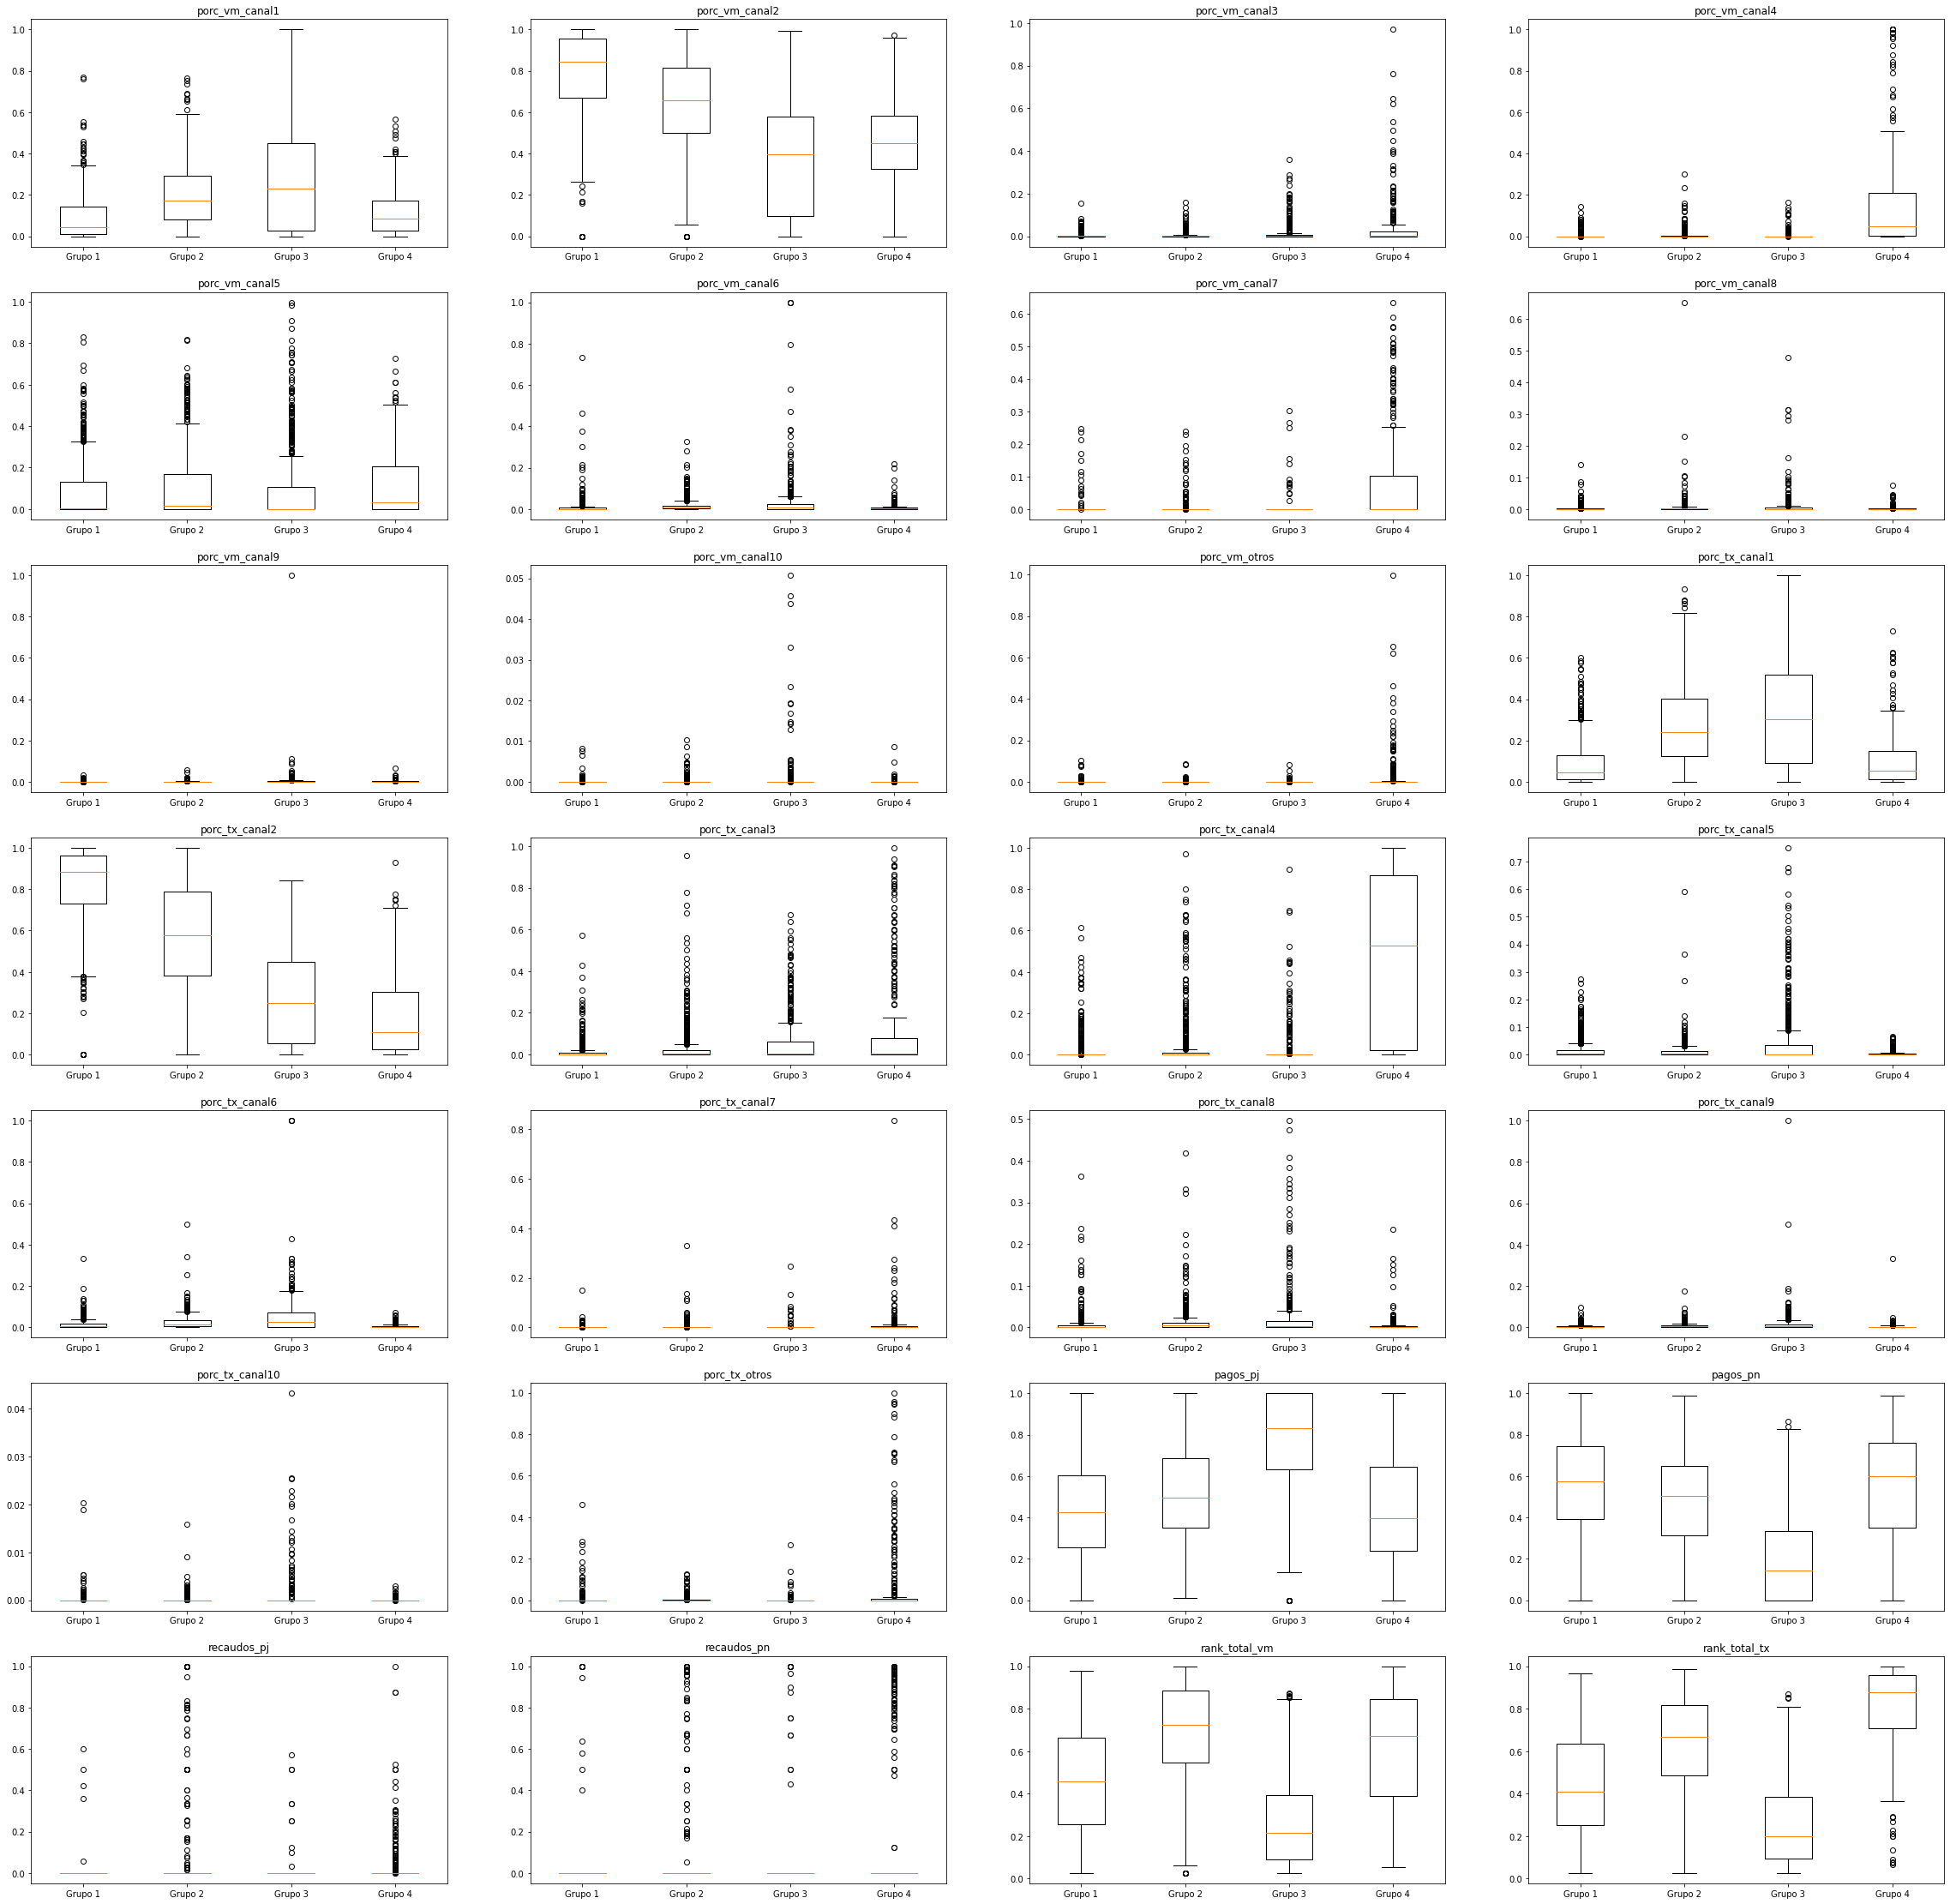

In [ ]:
_, axes = plt.subplots(7, 4, figsize=(40, 40))
grupos = [grupo0, grupo1, grupo2, grupo3]
col_num = ['porc_vm_canal1', 'porc_vm_canal2', 'porc_vm_canal3', 'porc_vm_canal4',
    'porc_vm_canal5', 'porc_vm_canal6', 'porc_vm_canal7', 'porc_vm_canal8',
    'porc_vm_canal9', 'porc_vm_canal10', 'porc_vm_otros', 'porc_tx_canal1',
    'porc_tx_canal2', 'porc_tx_canal3', 'porc_tx_canal4', 'porc_tx_canal5',
    'porc_tx_canal6', 'porc_tx_canal7', 'porc_tx_canal8', 'porc_tx_canal9',
    'porc_tx_canal10', 'porc_tx_otros', 'pagos_pj', 'pagos_pn',
    'recaudos_pj', 'recaudos_pn', 'rank_total_vm', 'rank_total_tx']

for axis, columna in zip(axes.flatten(), col_num):
  axis.boxplot([grupo[columna] for grupo in grupos], labels=["Grupo 1", "Grupo 2", "Grupo 3", "Grupo 4"])
  axis.title.set_text(columna)

plt.show()

 A continuación, se presenta la gráfica de los grupos con 3 de las variables utilizadas en la agrupación, donde el rojo es el grupo 1; el verde, el 2; el azul, el 3; y el cian, el 4

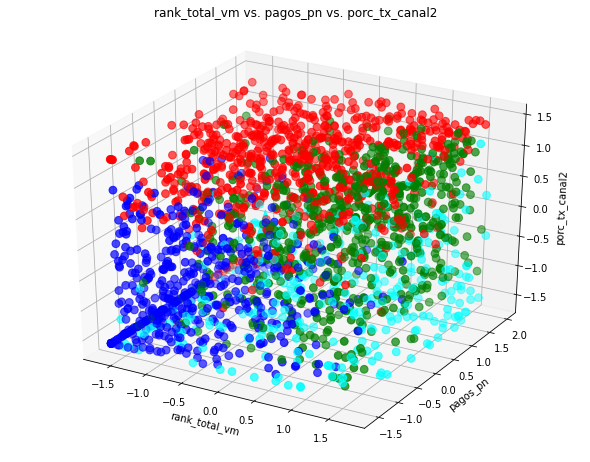

In [ ]:
k_means = cluster.KMeans(n_clusters=4).fit(df_estandarizado)
centroides = k_means.cluster_centers_

etiquetas = k_means.predict(df_estandarizado)

colores_centroides = ["red", "green", "blue", "cyan"]

colores_datos = [colores_centroides[etiqueta] for etiqueta in etiquetas]

figura = plt.figure(figsize=(8, 6))
axis = Axes3D(figura)
axis.scatter(df_estandarizado["rank_total_vm"], df_estandarizado["pagos_pn"], df_estandarizado["porc_tx_canal2"], c=colores_datos, s=60)
axis.scatter(centroides[:, 0], centroides[:, 1], centroides[:, 2], marker="*", c=colores_centroides, s=1000)
axis.set(xlabel="rank_total_vm", ylabel="pagos_pn", zlabel="porc_tx_canal2")
axis.title.set_text("rank_total_vm vs. pagos_pn vs. porc_tx_canal2")
plt.show()

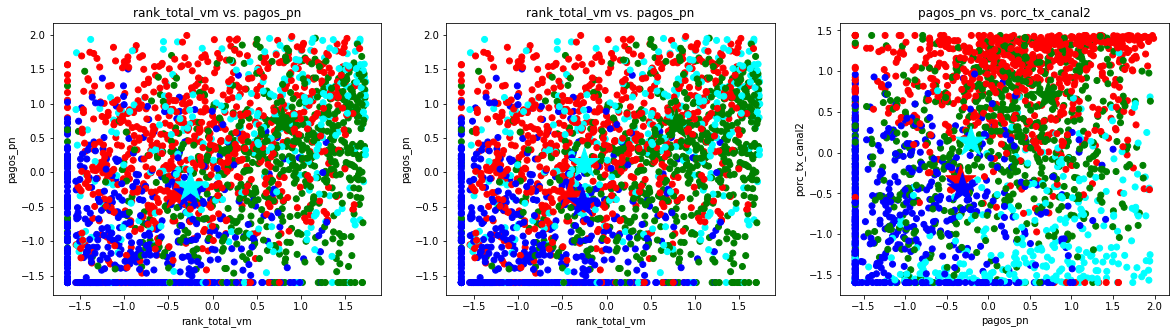

In [ ]:
figura, axes = plt.subplots(1, 3, figsize=(20, 5))

axes[0].scatter(df_estandarizado["rank_total_vm"], df_estandarizado["pagos_pn"], c=colores_datos)
axes[0].scatter(centroides[:, 0], centroides[:, 1], marker='*', c=colores_centroides, s=1000)
axes[0].set(xlabel="rank_total_vm", ylabel="pagos_pn")
axes[0].title.set_text("rank_total_vm vs. pagos_pn")

axes[1].scatter(df_estandarizado["rank_total_vm"], df_estandarizado["pagos_pn"], c=colores_datos)
axes[1].scatter(centroides[:, 0], centroides[:, 2], marker='*', c=colores_centroides, s=1000)
axes[1].set(xlabel="rank_total_vm", ylabel="pagos_pn")
axes[1].title.set_text("rank_total_vm vs. pagos_pn")

axes[2].scatter(df_estandarizado["pagos_pn"], df_estandarizado["porc_tx_canal2"], c=colores_datos)
axes[2].scatter(centroides[:, 1], centroides[:, 2], marker='*', c=colores_centroides, s=1000)
axes[2].set(xlabel="pagos_pn", ylabel="porc_tx_canal2")
axes[2].title.set_text("pagos_pn vs. porc_tx_canal2")

plt.show()

Hallamos los registros más cercanos a los centroides de cada grupo.

In [ ]:
closest, _ = pairwise_distances_argmin_min(centroides, df_estandarizado)
closest

array([1272,  961, 1018, 1645])

In [ ]:
df.iloc[[1272]]

,nit,impo_cv,expo_vt,cxp,cxc,totalinventory,pagos_pj,pagos_pn,tiene_ventas_fisicas,tiene_ventas_electronicas,recaudos_pj,recaudos_pn,rotacion_inventarios,rotacion_cxc,rotacion_cxp,ciclo_negocio,ciclo_financiero,total_vm,porc_vm_canal1,porc_vm_canal2,porc_vm_canal3,porc_vm_canal4,porc_vm_canal5,porc_vm_canal6,porc_vm_canal7,porc_vm_canal8,porc_vm_canal9,porc_vm_canal10,porc_vm_otros,total_tx,porc_tx_canal1,porc_tx_canal2,porc_tx_canal3,porc_tx_canal4,porc_tx_canal5,porc_tx_canal6,porc_tx_canal7,porc_tx_canal8,porc_tx_canal9,porc_tx_canal10,porc_tx_otros,rank_total_vm,rank_total_tx,Grupo
1272,C-5969405131522867746,2,2,2,3,2,0.611,0.389,1,0,0.0,0.0,2,2,2,3,3,2.473707e+09,0.107125,0.734802,0.034703,0.013001,0.0,0.004979,0.10262,0.000864,0.001907,0.0,0.0,1279.75,0.199127,0.256365,0.179137,0.318096,0.0,0.029954,0.005014,0.00293,0.009377,0.0,0.0,0.430902,0.718623,3


In [ ]:
df.iloc[[961]]

,nit,impo_cv,expo_vt,cxp,cxc,totalinventory,pagos_pj,pagos_pn,tiene_ventas_fisicas,tiene_ventas_electronicas,recaudos_pj,recaudos_pn,rotacion_inventarios,rotacion_cxc,rotacion_cxp,ciclo_negocio,ciclo_financiero,total_vm,porc_vm_canal1,porc_vm_canal2,porc_vm_canal3,porc_vm_canal4,porc_vm_canal5,porc_vm_canal6,porc_vm_canal7,porc_vm_canal8,porc_vm_canal9,porc_vm_canal10,porc_vm_otros,total_tx,porc_tx_canal1,porc_tx_canal2,porc_tx_canal3,porc_tx_canal4,porc_tx_canal5,porc_tx_canal6,porc_tx_canal7,porc_tx_canal8,porc_tx_canal9,porc_tx_canal10,porc_tx_otros,rank_total_vm,rank_total_tx,Grupo
961,C8776784120283251403,2,2,2,3,2,0.576,0.424,0,0,0.0,0.0,2,2,2,4,3,4.611786e+09,0.035896,0.961284,0.0,0.0,0.0,0.001762,0.0,0.0007,0.000358,0.0,0.0,500.0,0.086167,0.897833,0.0,0.0,0.0,0.008,0.0,0.005,0.003,0.0,0.0,0.589035,0.503398,0


In [ ]:
df.iloc[[1018]]

,nit,impo_cv,expo_vt,cxp,cxc,totalinventory,pagos_pj,pagos_pn,tiene_ventas_fisicas,tiene_ventas_electronicas,recaudos_pj,recaudos_pn,rotacion_inventarios,rotacion_cxc,rotacion_cxp,ciclo_negocio,ciclo_financiero,total_vm,porc_vm_canal1,porc_vm_canal2,porc_vm_canal3,porc_vm_canal4,porc_vm_canal5,porc_vm_canal6,porc_vm_canal7,porc_vm_canal8,porc_vm_canal9,porc_vm_canal10,porc_vm_otros,total_tx,porc_tx_canal1,porc_tx_canal2,porc_tx_canal3,porc_tx_canal4,porc_tx_canal5,porc_tx_canal6,porc_tx_canal7,porc_tx_canal8,porc_tx_canal9,porc_tx_canal10,porc_tx_otros,rank_total_vm,rank_total_tx,Grupo
1018,C-8730154585644929466,2,2,2,3,2,0.897,0.103,0,0,0.0,0.0,2,3,2,4,5,1.005165e+09,0.395975,0.557426,0.008837,0.0,0.0,0.024912,0.0,0.005194,0.007655,0.0,0.0,69.824747,0.445162,0.333374,0.068744,0.0,0.0,0.091137,0.0,0.03294,0.028643,0.0,0.0,0.243317,0.209787,2


In [ ]:
df.iloc[[1645]]

,nit,impo_cv,expo_vt,cxp,cxc,totalinventory,pagos_pj,pagos_pn,tiene_ventas_fisicas,tiene_ventas_electronicas,recaudos_pj,recaudos_pn,rotacion_inventarios,rotacion_cxc,rotacion_cxp,ciclo_negocio,ciclo_financiero,total_vm,porc_vm_canal1,porc_vm_canal2,porc_vm_canal3,porc_vm_canal4,porc_vm_canal5,porc_vm_canal6,porc_vm_canal7,porc_vm_canal8,porc_vm_canal9,porc_vm_canal10,porc_vm_otros,total_tx,porc_tx_canal1,porc_tx_canal2,porc_tx_canal3,porc_tx_canal4,porc_tx_canal5,porc_tx_canal6,porc_tx_canal7,porc_tx_canal8,porc_tx_canal9,porc_tx_canal10,porc_tx_otros,rank_total_vm,rank_total_tx,Grupo
1645,C6535674373427585880,3,2,3,6,5,0.496,0.504,1,0,0.0,0.0,4,3,2,5,5,1.424653e+10,0.070077,0.817732,0.000002,0.0,0.10663,0.002906,0.0,0.000659,0.001929,0.0,0.000064,1438.444444,0.169686,0.779604,0.000695,0.0,0.014252,0.017959,0.0,0.011471,0.005639,0.0,0.000695,0.811509,0.739465,1


Por último se imprimen los diagramas de barras de las variables categóricas de acuerdo al grupo.

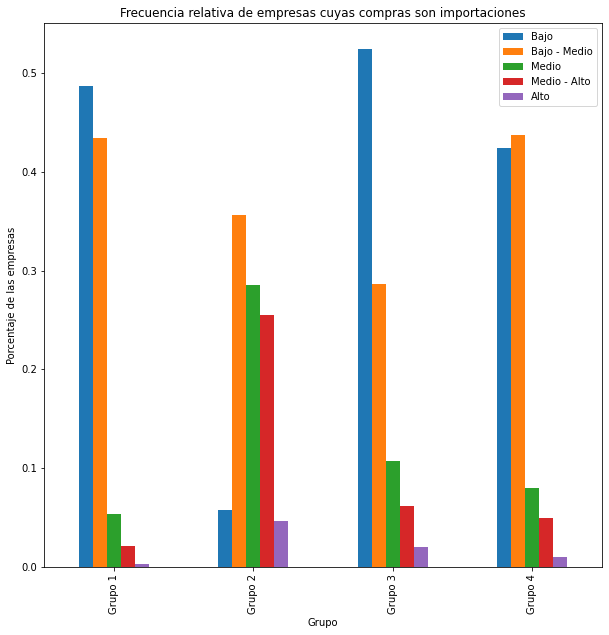

In [ ]:
impo_cv_g1 = grupo0["impo_cv"].value_counts().to_frame().sort_index()["impo_cv"].tolist()
total_impo_cv_g1 = sum(impo_cv_g1)
impo_cv_g1_porc = [valor / total_impo_cv_g1 for valor in impo_cv_g1]
impo_cv_g1_porc = ["Grupo 1"] + impo_cv_g1_porc

impo_cv_g2 = grupo1["impo_cv"].value_counts().to_frame().sort_index()["impo_cv"].tolist()
total_impo_cv_g2 = sum(impo_cv_g2)
impo_cv_g2_porc = [valor / total_impo_cv_g2 for valor in impo_cv_g2]
impo_cv_g2_porc = ["Grupo 2"] + impo_cv_g2_porc

impo_cv_g3 = grupo2["impo_cv"].value_counts().to_frame().sort_index()["impo_cv"].tolist()
total_impo_cv_g3 = sum(impo_cv_g3)
impo_cv_g3_porc = [valor / total_impo_cv_g3 for valor in impo_cv_g3]
impo_cv_g3_porc = ["Grupo 3"] + impo_cv_g3_porc

impo_cv_g4 = grupo3["impo_cv"].value_counts().to_frame().sort_index()["impo_cv"].tolist()
total_impo_cv_g4 = sum(impo_cv_g4)
impo_cv_g4_porc = [valor / total_impo_cv_g4 for valor in impo_cv_g4]
impo_cv_g4_porc = ["Grupo 4"] + impo_cv_g4_porc

df_impo_cv = pd.DataFrame([impo_cv_g1_porc, impo_cv_g2_porc, impo_cv_g3_porc, impo_cv_g4_porc], columns=['Grupo', 'Bajo', 'Bajo - Medio', 'Medio', 'Medio - Alto', 'Alto'])
df_impo_cv.plot(x='Grupo', ylabel='Porcentaje de las empresas', kind='bar', stacked=False, title='Frecuencia relativa de empresas cuyas compras son importaciones',figsize=(10,10)).legend(loc='best')


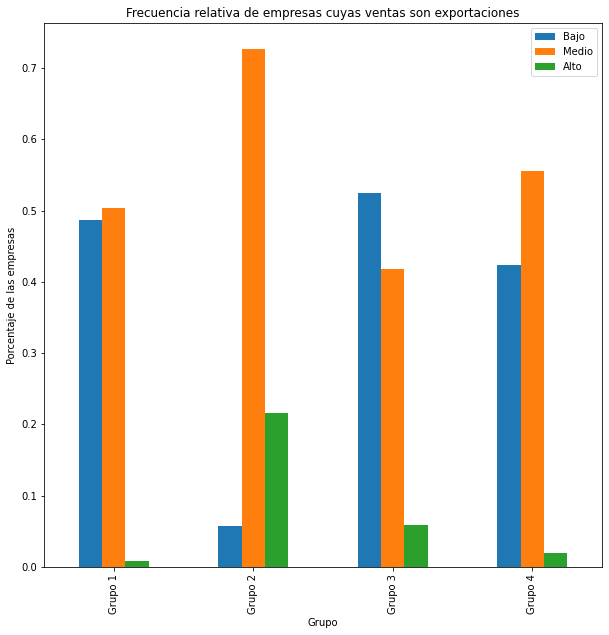

In [ ]:
expo_vt_g1 = grupo0["expo_vt"].value_counts().to_frame().sort_index()["expo_vt"].tolist()
total_expo_vt_g1 = sum(expo_vt_g1)
expo_vt_g1_porc = [valor / total_expo_vt_g1 for valor in expo_vt_g1]
expo_vt_g1_porc = ["Grupo 1"] + expo_vt_g1_porc

expo_vt_g2 = grupo1["expo_vt"].value_counts().to_frame().sort_index()["expo_vt"].tolist()
total_expo_vt_g2 = sum(expo_vt_g2)
expo_vt_g2_porc = [valor / total_expo_vt_g2 for valor in expo_vt_g2]
expo_vt_g2_porc = ["Grupo 2"] + expo_vt_g2_porc

expo_vt_g3 = grupo2["expo_vt"].value_counts().to_frame().sort_index()["expo_vt"].tolist()
total_expo_vt_g3 = sum(expo_vt_g3)
expo_vt_g3_porc = [valor / total_expo_vt_g3 for valor in expo_vt_g3]
expo_vt_g3_porc = ["Grupo 3"] + expo_vt_g3_porc

expo_vt_g4 = grupo3["expo_vt"].value_counts().to_frame().sort_index()["expo_vt"].tolist()
total_expo_vt_g4 = sum(expo_vt_g4)
expo_vt_g4_porc = [valor / total_expo_vt_g4 for valor in expo_vt_g4]
expo_vt_g4_porc = ["Grupo 4"] + expo_vt_g4_porc

df_expo_vt = pd.DataFrame([expo_vt_g1_porc, expo_vt_g2_porc, expo_vt_g3_porc, expo_vt_g4_porc], columns=['Grupo', 'Bajo', 'Medio', 'Alto'])
df_expo_vt.plot(x='Grupo', ylabel='Porcentaje de las empresas', kind='bar', stacked=False, title='Frecuencia relativa de empresas cuyas ventas son exportaciones',figsize=(10,10)).legend(loc='best')

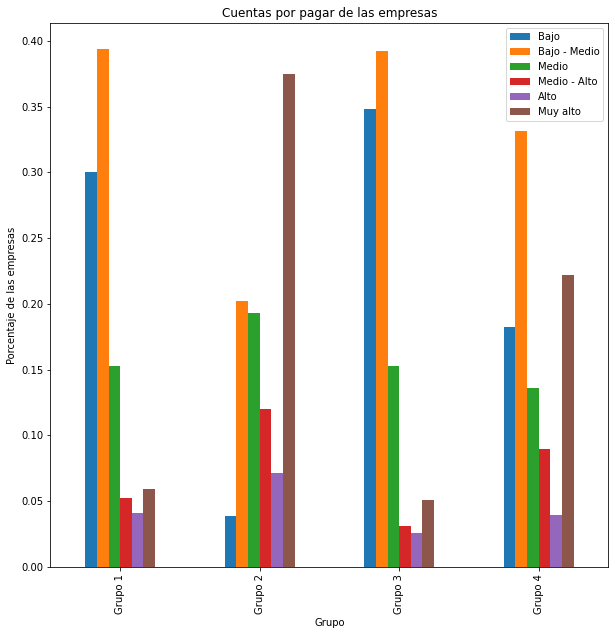

In [ ]:
cxp_g1 = grupo0["cxp"].value_counts().to_frame().sort_index()["cxp"].tolist()
total_cxp_g1 = sum(cxp_g1)
cxp_g1_porc = [valor / total_cxp_g1 for valor in cxp_g1]
cxp_g1_porc = ["Grupo 1"] + cxp_g1_porc

cxp_g2 = grupo1["cxp"].value_counts().to_frame().sort_index()["cxp"].tolist()
total_cxp_g2 = sum(cxp_g2)
cxp_g2_porc = [valor / total_cxp_g2 for valor in cxp_g2]
cxp_g2_porc = ["Grupo 2"] + cxp_g2_porc

cxp_g3 = grupo2["cxp"].value_counts().to_frame().sort_index()["cxp"].tolist()
total_cxp_g3 = sum(cxp_g3)
cxp_g3_porc = [valor / total_cxp_g3 for valor in cxp_g3]
cxp_g3_porc = ["Grupo 3"] + cxp_g3_porc

cxp_g4 = grupo3["cxp"].value_counts().to_frame().sort_index()["cxp"].tolist()
total_cxp_g4 = sum(cxp_g4)
cxp_g4_porc = [valor / total_cxp_g4 for valor in cxp_g4]
cxp_g4_porc = ["Grupo 4"] + cxp_g4_porc

df_cxp = pd.DataFrame([cxp_g1_porc, cxp_g2_porc, cxp_g3_porc, cxp_g4_porc], columns=['Grupo', 'Bajo', 'Bajo - Medio', 'Medio', 'Medio - Alto', 'Alto', 'Muy alto'])
df_cxp.plot(x='Grupo', ylabel='Porcentaje de las empresas', kind='bar', stacked=False, title='Cuentas por pagar de las empresas',figsize=(10,10)).legend(loc='best')

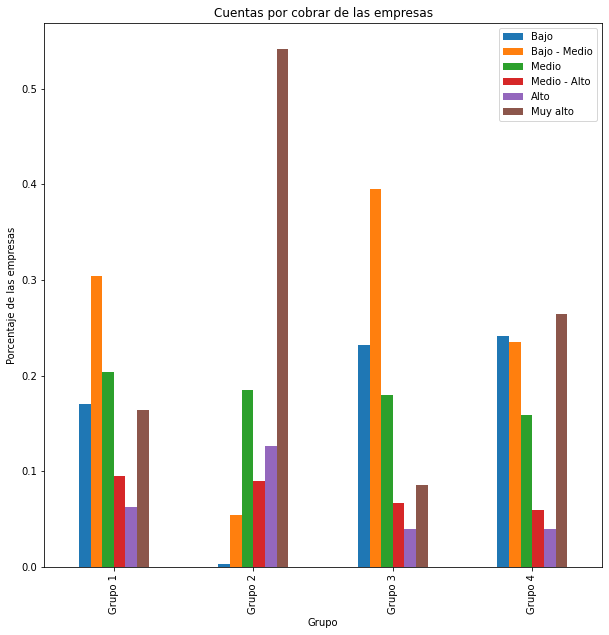

In [ ]:
cxc_g1 = grupo0["cxc"].value_counts().to_frame().sort_index()["cxc"].tolist()
total_cxc_g1 = sum(cxc_g1)
cxc_g1_porc = [valor / total_cxc_g1 for valor in cxc_g1]
cxc_g1_porc = ["Grupo 1"] + cxc_g1_porc

cxc_g2 = grupo1["cxc"].value_counts().to_frame().sort_index()["cxc"].tolist()
total_cxc_g2 = sum(cxc_g2)
cxc_g2_porc = [valor / total_cxc_g2 for valor in cxc_g2]
cxc_g2_porc = ["Grupo 2"] + cxc_g2_porc

cxc_g3 = grupo2["cxc"].value_counts().to_frame().sort_index()["cxc"].tolist()
total_cxc_g3 = sum(cxc_g3)
cxc_g3_porc = [valor / total_cxc_g3 for valor in cxc_g3]
cxc_g3_porc = ["Grupo 3"] + cxc_g3_porc

cxc_g4 = grupo3["cxc"].value_counts().to_frame().sort_index()["cxc"].tolist()
total_cxc_g4 = sum(cxc_g4)
cxc_g4_porc = [valor / total_cxc_g4 for valor in cxc_g4]
cxc_g4_porc = ["Grupo 4"] + cxc_g4_porc

df_cxc = pd.DataFrame([cxc_g1_porc, cxc_g2_porc, cxc_g3_porc, cxc_g4_porc], columns=['Grupo', 'Bajo', 'Bajo - Medio', 'Medio', 'Medio - Alto', 'Alto', 'Muy alto'])
df_cxc.plot(x='Grupo', ylabel='Porcentaje de las empresas', kind='bar', stacked=False, title='Cuentas por cobrar de las empresas',figsize=(10,10)).legend(loc='best')

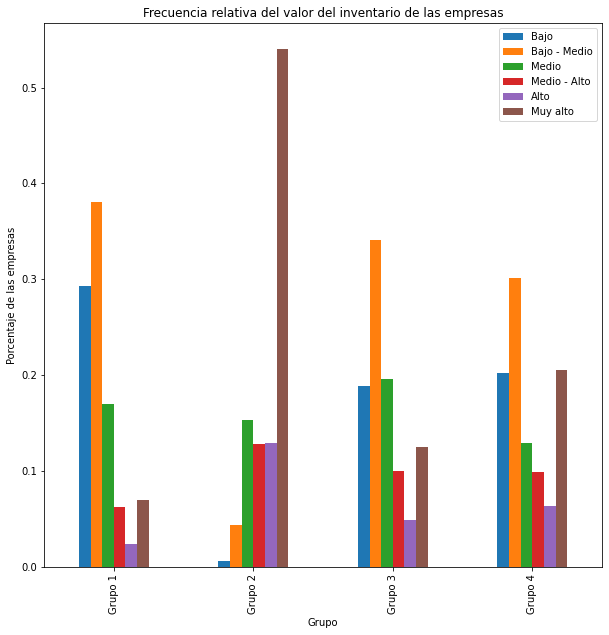

In [ ]:
totalinventory_g1 = grupo0["totalinventory"].value_counts().to_frame().sort_index()["totalinventory"].tolist()
total_totalinventory_g1 = sum(totalinventory_g1)
totalinventory_g1_porc = [valor / total_totalinventory_g1 for valor in totalinventory_g1]
totalinventory_g1_porc = ["Grupo 1"] + totalinventory_g1_porc

totalinventory_g2 = grupo1["totalinventory"].value_counts().to_frame().sort_index()["totalinventory"].tolist()
total_totalinventory_g2 = sum(totalinventory_g2)
totalinventory_g2_porc = [valor / total_totalinventory_g2 for valor in totalinventory_g2]
totalinventory_g2_porc = ["Grupo 2"] + totalinventory_g2_porc

totalinventory_g3 = grupo2["totalinventory"].value_counts().to_frame().sort_index()["totalinventory"].tolist()
total_totalinventory_g3 = sum(totalinventory_g3)
totalinventory_g3_porc = [valor / total_totalinventory_g3 for valor in totalinventory_g3]
totalinventory_g3_porc = ["Grupo 3"] + totalinventory_g3_porc

totalinventory_g4 = grupo3["totalinventory"].value_counts().to_frame().sort_index()["totalinventory"].tolist()
total_totalinventory_g4 = sum(totalinventory_g4)
totalinventory_g4_porc = [valor / total_totalinventory_g4 for valor in totalinventory_g4]
totalinventory_g4_porc = ["Grupo 4"] + totalinventory_g4_porc

df_totalinventory = pd.DataFrame([totalinventory_g1_porc, totalinventory_g2_porc, totalinventory_g3_porc, totalinventory_g4_porc], columns=['Grupo', 'Bajo', 'Bajo - Medio', 'Medio', 'Medio - Alto', 'Alto', 'Muy alto'])
df_totalinventory.plot(x='Grupo', ylabel='Porcentaje de las empresas', kind='bar', stacked=False, title='Frecuencia relativa del valor del inventario de las empresas',figsize=(10,10)).legend(loc='best')

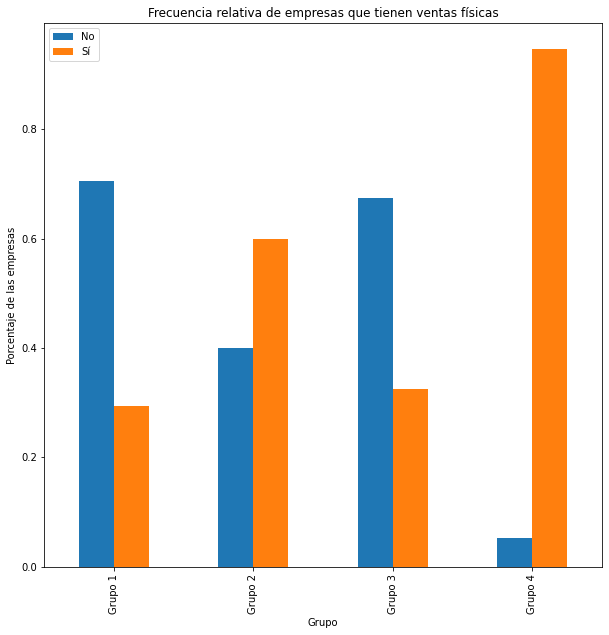

In [ ]:
tiene_ventas_fisicas_g1 = grupo0["tiene_ventas_fisicas"].value_counts().to_frame().sort_index()["tiene_ventas_fisicas"].tolist()
total_tiene_ventas_fisicas_g1 = sum(tiene_ventas_fisicas_g1)
tiene_ventas_fisicas_g1_porc = [valor / total_tiene_ventas_fisicas_g1 for valor in tiene_ventas_fisicas_g1]
tiene_ventas_fisicas_g1_porc = ["Grupo 1"] + tiene_ventas_fisicas_g1_porc

tiene_ventas_fisicas_g2 = grupo1["tiene_ventas_fisicas"].value_counts().to_frame().sort_index()["tiene_ventas_fisicas"].tolist()
total_tiene_ventas_fisicas_g2 = sum(tiene_ventas_fisicas_g2)
tiene_ventas_fisicas_g2_porc = [valor / total_tiene_ventas_fisicas_g2 for valor in tiene_ventas_fisicas_g2]
tiene_ventas_fisicas_g2_porc = ["Grupo 2"] + tiene_ventas_fisicas_g2_porc

tiene_ventas_fisicas_g3 = grupo2["tiene_ventas_fisicas"].value_counts().to_frame().sort_index()["tiene_ventas_fisicas"].tolist()
total_tiene_ventas_fisicas_g3 = sum(tiene_ventas_fisicas_g3)
tiene_ventas_fisicas_g3_porc = [valor / total_tiene_ventas_fisicas_g3 for valor in tiene_ventas_fisicas_g3]
tiene_ventas_fisicas_g3_porc = ["Grupo 3"] + tiene_ventas_fisicas_g3_porc

tiene_ventas_fisicas_g4 = grupo3["tiene_ventas_fisicas"].value_counts().to_frame().sort_index()["tiene_ventas_fisicas"].tolist()
total_tiene_ventas_fisicas_g4 = sum(tiene_ventas_fisicas_g4)
tiene_ventas_fisicas_g4_porc = [valor / total_tiene_ventas_fisicas_g4 for valor in tiene_ventas_fisicas_g4]
tiene_ventas_fisicas_g4_porc = ["Grupo 4"] + tiene_ventas_fisicas_g4_porc

df_tiene_ventas_fisicas = pd.DataFrame([tiene_ventas_fisicas_g1_porc, tiene_ventas_fisicas_g2_porc, tiene_ventas_fisicas_g3_porc, tiene_ventas_fisicas_g4_porc], columns=['Grupo', 'No', 'Sí'])
df_tiene_ventas_fisicas.plot(x='Grupo', ylabel='Porcentaje de las empresas', kind='bar', stacked=False, title='Frecuencia relativa de empresas que tienen ventas físicas',figsize=(10,10)).legend(loc='best')

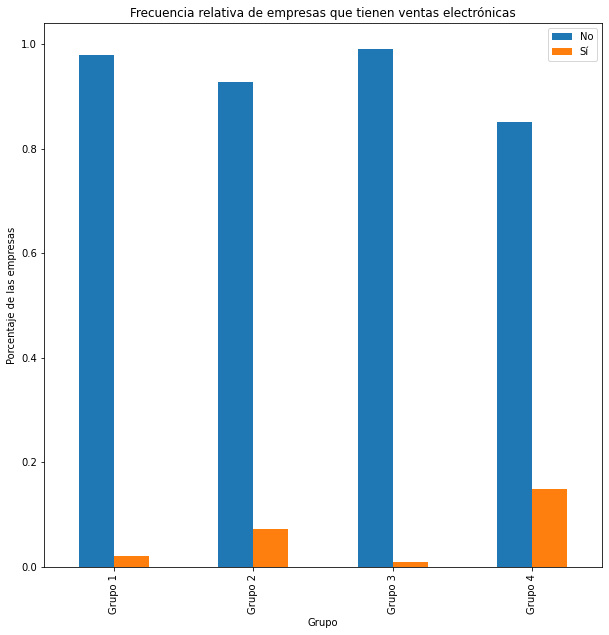

In [ ]:
tiene_ventas_electronicas_g1 = grupo0["tiene_ventas_electronicas"].value_counts().to_frame().sort_index()["tiene_ventas_electronicas"].tolist()
total_tiene_ventas_electronicas_g1 = sum(tiene_ventas_electronicas_g1)
tiene_ventas_electronicas_g1_porc = [valor / total_tiene_ventas_electronicas_g1 for valor in tiene_ventas_electronicas_g1]
tiene_ventas_electronicas_g1_porc = ["Grupo 1"] + tiene_ventas_electronicas_g1_porc

tiene_ventas_electronicas_g2 = grupo1["tiene_ventas_electronicas"].value_counts().to_frame().sort_index()["tiene_ventas_electronicas"].tolist()
total_tiene_ventas_electronicas_g2 = sum(tiene_ventas_electronicas_g2)
tiene_ventas_electronicas_g2_porc = [valor / total_tiene_ventas_electronicas_g2 for valor in tiene_ventas_electronicas_g2]
tiene_ventas_electronicas_g2_porc = ["Grupo 2"] + tiene_ventas_electronicas_g2_porc

tiene_ventas_electronicas_g3 = grupo2["tiene_ventas_electronicas"].value_counts().to_frame().sort_index()["tiene_ventas_electronicas"].tolist()
total_tiene_ventas_electronicas_g3 = sum(tiene_ventas_electronicas_g3)
tiene_ventas_electronicas_g3_porc = [valor / total_tiene_ventas_electronicas_g3 for valor in tiene_ventas_electronicas_g3]
tiene_ventas_electronicas_g3_porc = ["Grupo 3"] + tiene_ventas_electronicas_g3_porc

tiene_ventas_electronicas_g4 = grupo3["tiene_ventas_electronicas"].value_counts().to_frame().sort_index()["tiene_ventas_electronicas"].tolist()
total_tiene_ventas_electronicas_g4 = sum(tiene_ventas_electronicas_g4)
tiene_ventas_electronicas_g4_porc = [valor / total_tiene_ventas_electronicas_g4 for valor in tiene_ventas_electronicas_g4]
tiene_ventas_electronicas_g4_porc = ["Grupo 4"] + tiene_ventas_electronicas_g4_porc

df_tiene_ventas_electronicas = pd.DataFrame([tiene_ventas_electronicas_g1_porc, tiene_ventas_electronicas_g2_porc, tiene_ventas_electronicas_g3_porc, tiene_ventas_electronicas_g4_porc], columns=['Grupo', 'No', 'Sí'])
df_tiene_ventas_electronicas.plot(x='Grupo', ylabel='Porcentaje de las empresas', kind='bar', stacked=False, title='Frecuencia relativa de empresas que tienen ventas electrónicas',figsize=(10,10)).legend(loc='best')

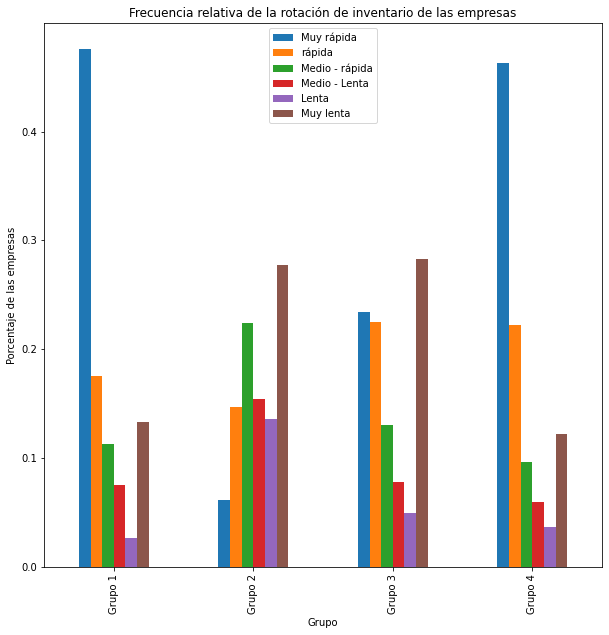

In [ ]:
rotacion_inventarios_g1 = grupo0["rotacion_inventarios"].value_counts().to_frame().sort_index()["rotacion_inventarios"].tolist()
total_rotacion_inventarios_g1 = sum(rotacion_inventarios_g1)
rotacion_inventarios_g1_porc = [valor / total_rotacion_inventarios_g1 for valor in rotacion_inventarios_g1]
rotacion_inventarios_g1_porc = ["Grupo 1"] + rotacion_inventarios_g1_porc

rotacion_inventarios_g2 = grupo1["rotacion_inventarios"].value_counts().to_frame().sort_index()["rotacion_inventarios"].tolist()
total_rotacion_inventarios_g2 = sum(rotacion_inventarios_g2)
rotacion_inventarios_g2_porc = [valor / total_rotacion_inventarios_g2 for valor in rotacion_inventarios_g2]
rotacion_inventarios_g2_porc = ["Grupo 2"] + rotacion_inventarios_g2_porc

rotacion_inventarios_g3 = grupo2["rotacion_inventarios"].value_counts().to_frame().sort_index()["rotacion_inventarios"].tolist()
total_rotacion_inventarios_g3 = sum(rotacion_inventarios_g3)
rotacion_inventarios_g3_porc = [valor / total_rotacion_inventarios_g3 for valor in rotacion_inventarios_g3]
rotacion_inventarios_g3_porc = ["Grupo 3"] + rotacion_inventarios_g3_porc

rotacion_inventarios_g4 = grupo3["rotacion_inventarios"].value_counts().to_frame().sort_index()["rotacion_inventarios"].tolist()
total_rotacion_inventarios_g4 = sum(rotacion_inventarios_g4)
rotacion_inventarios_g4_porc = [valor / total_rotacion_inventarios_g4 for valor in rotacion_inventarios_g4]
rotacion_inventarios_g4_porc = ["Grupo 4"] + rotacion_inventarios_g4_porc

df_rotacion_inventarios = pd.DataFrame([rotacion_inventarios_g1_porc, rotacion_inventarios_g2_porc, rotacion_inventarios_g3_porc, rotacion_inventarios_g4_porc], columns=['Grupo', 'Muy rápida', 'rápida', 'Medio - rápida', 'Medio - Lenta', 'Lenta', 'Muy lenta'])
df_rotacion_inventarios.plot(x='Grupo', ylabel='Porcentaje de las empresas', kind='bar', stacked=False, title='Frecuencia relativa de la rotación de inventario de las empresas',figsize=(10,10)).legend(loc='best')

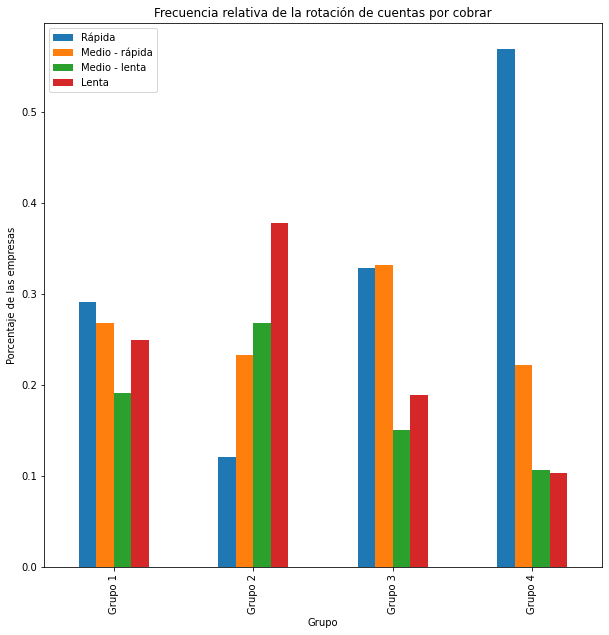

In [ ]:
rotacion_cxc_g1 = grupo0["rotacion_cxc"].value_counts().to_frame().sort_index()["rotacion_cxc"].tolist()
total_rotacion_cxc_g1 = sum(rotacion_cxc_g1)
rotacion_cxc_g1_porc = [valor / total_rotacion_cxc_g1 for valor in rotacion_cxc_g1]
rotacion_cxc_g1_porc = ["Grupo 1"] + rotacion_cxc_g1_porc

rotacion_cxc_g2 = grupo1["rotacion_cxc"].value_counts().to_frame().sort_index()["rotacion_cxc"].tolist()
total_rotacion_cxc_g2 = sum(rotacion_cxc_g2)
rotacion_cxc_g2_porc = [valor / total_rotacion_cxc_g2 for valor in rotacion_cxc_g2]
rotacion_cxc_g2_porc = ["Grupo 2"] + rotacion_cxc_g2_porc

rotacion_cxc_g3 = grupo2["rotacion_cxc"].value_counts().to_frame().sort_index()["rotacion_cxc"].tolist()
total_rotacion_cxc_g3 = sum(rotacion_cxc_g3)
rotacion_cxc_g3_porc = [valor / total_rotacion_cxc_g3 for valor in rotacion_cxc_g3]
rotacion_cxc_g3_porc = ["Grupo 3"] + rotacion_cxc_g3_porc

rotacion_cxc_g4 = grupo3["rotacion_cxc"].value_counts().to_frame().sort_index()["rotacion_cxc"].tolist()
total_rotacion_cxc_g4 = sum(rotacion_cxc_g4)
rotacion_cxc_g4_porc = [valor / total_rotacion_cxc_g4 for valor in rotacion_cxc_g4]
rotacion_cxc_g4_porc = ["Grupo 4"] + rotacion_cxc_g4_porc

df_rotacion_cxc = pd.DataFrame([rotacion_cxc_g1_porc, rotacion_cxc_g2_porc, rotacion_cxc_g3_porc, rotacion_cxc_g4_porc], columns=['Grupo', 'Rápida', 'Medio - rápida', 'Medio - lenta', 'Lenta'])
df_rotacion_cxc.plot(x='Grupo', ylabel='Porcentaje de las empresas', kind='bar', stacked=False, title='Frecuencia relativa de la rotación de cuentas por cobrar',figsize=(10,10)).legend(loc='best')

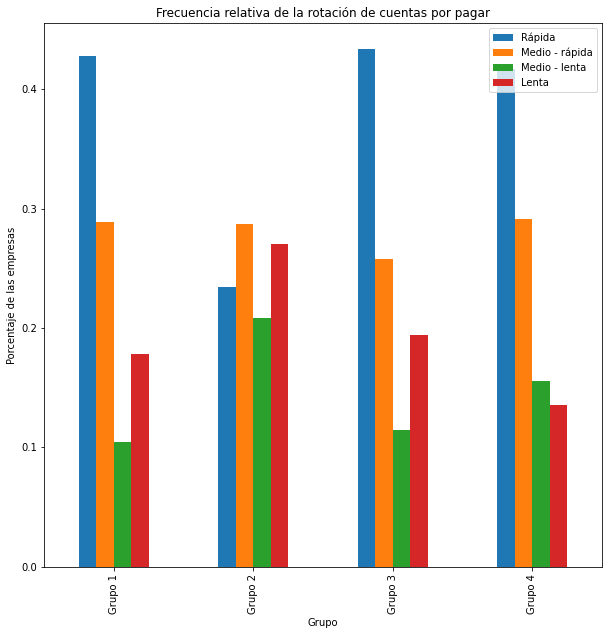

In [ ]:
rotacion_cxp_g1 = grupo0["rotacion_cxp"].value_counts().to_frame().sort_index()["rotacion_cxp"].tolist()
total_rotacion_cxp_g1 = sum(rotacion_cxp_g1)
rotacion_cxp_g1_porc = [valor / total_rotacion_cxp_g1 for valor in rotacion_cxp_g1]
rotacion_cxp_g1_porc = ["Grupo 1"] + rotacion_cxp_g1_porc

rotacion_cxp_g2 = grupo1["rotacion_cxp"].value_counts().to_frame().sort_index()["rotacion_cxp"].tolist()
total_rotacion_cxp_g2 = sum(rotacion_cxp_g2)
rotacion_cxp_g2_porc = [valor / total_rotacion_cxp_g2 for valor in rotacion_cxp_g2]
rotacion_cxp_g2_porc = ["Grupo 2"] + rotacion_cxp_g2_porc

rotacion_cxp_g3 = grupo2["rotacion_cxp"].value_counts().to_frame().sort_index()["rotacion_cxp"].tolist()
total_rotacion_cxp_g3 = sum(rotacion_cxp_g3)
rotacion_cxp_g3_porc = [valor / total_rotacion_cxp_g3 for valor in rotacion_cxp_g3]
rotacion_cxp_g3_porc = ["Grupo 3"] + rotacion_cxp_g3_porc

rotacion_cxp_g4 = grupo3["rotacion_cxp"].value_counts().to_frame().sort_index()["rotacion_cxp"].tolist()
total_rotacion_cxp_g4 = sum(rotacion_cxp_g4)
rotacion_cxp_g4_porc = [valor / total_rotacion_cxp_g4 for valor in rotacion_cxp_g4]
rotacion_cxp_g4_porc = ["Grupo 4"] + rotacion_cxp_g4_porc

df_rotacion_cxp = pd.DataFrame([rotacion_cxp_g1_porc, rotacion_cxp_g2_porc, rotacion_cxp_g3_porc, rotacion_cxp_g4_porc], columns=['Grupo', 'Rápida', 'Medio - rápida', 'Medio - lenta', 'Lenta'])
df_rotacion_cxp.plot(x='Grupo', ylabel='Porcentaje de las empresas', kind='bar', stacked=False, title='Frecuencia relativa de la rotación de cuentas por pagar',figsize=(10,10)).legend(loc='best')

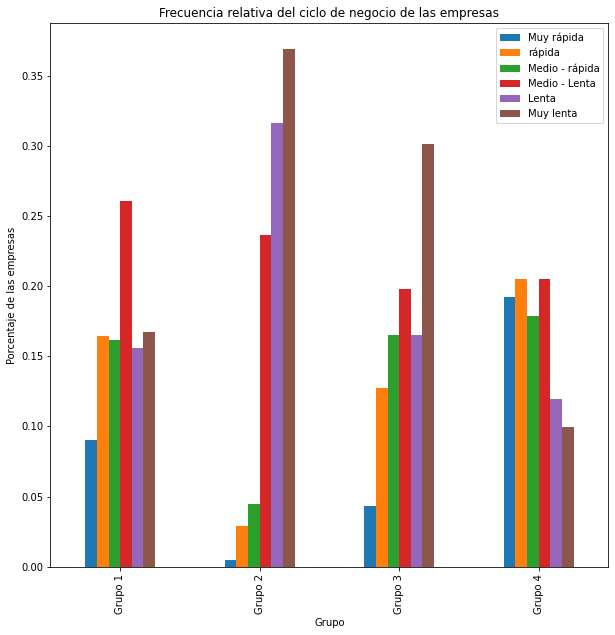

In [ ]:
ciclo_negocio_g1 = grupo0["ciclo_negocio"].value_counts().to_frame().sort_index()["ciclo_negocio"].tolist()
total_ciclo_negocio_g1 = sum(ciclo_negocio_g1)
ciclo_negocio_g1_porc = [valor / total_ciclo_negocio_g1 for valor in ciclo_negocio_g1]
ciclo_negocio_g1_porc = ["Grupo 1"] + ciclo_negocio_g1_porc

ciclo_negocio_g2 = grupo1["ciclo_negocio"].value_counts().to_frame().sort_index()["ciclo_negocio"].tolist()
total_ciclo_negocio_g2 = sum(ciclo_negocio_g2)
ciclo_negocio_g2_porc = [valor / total_ciclo_negocio_g2 for valor in ciclo_negocio_g2]
ciclo_negocio_g2_porc = ["Grupo 2"] + ciclo_negocio_g2_porc

ciclo_negocio_g3 = grupo2["ciclo_negocio"].value_counts().to_frame().sort_index()["ciclo_negocio"].tolist()
total_ciclo_negocio_g3 = sum(ciclo_negocio_g3)
ciclo_negocio_g3_porc = [valor / total_ciclo_negocio_g3 for valor in ciclo_negocio_g3]
ciclo_negocio_g3_porc = ["Grupo 3"] + ciclo_negocio_g3_porc

ciclo_negocio_g4 = grupo3["ciclo_negocio"].value_counts().to_frame().sort_index()["ciclo_negocio"].tolist()
total_ciclo_negocio_g4 = sum(ciclo_negocio_g4)
ciclo_negocio_g4_porc = [valor / total_ciclo_negocio_g4 for valor in ciclo_negocio_g4]
ciclo_negocio_g4_porc = ["Grupo 4"] + ciclo_negocio_g4_porc

df_ciclo_negocio = pd.DataFrame([ciclo_negocio_g1_porc, ciclo_negocio_g2_porc, ciclo_negocio_g3_porc, ciclo_negocio_g4_porc], columns=['Grupo', 'Muy rápida', 'rápida', 'Medio - rápida', 'Medio - Lenta', 'Lenta', 'Muy lenta'])
df_ciclo_negocio.plot(x='Grupo', ylabel='Porcentaje de las empresas', kind='bar', stacked=False, title='Frecuencia relativa del ciclo de negocio de las empresas',figsize=(10,10)).legend(loc='best')

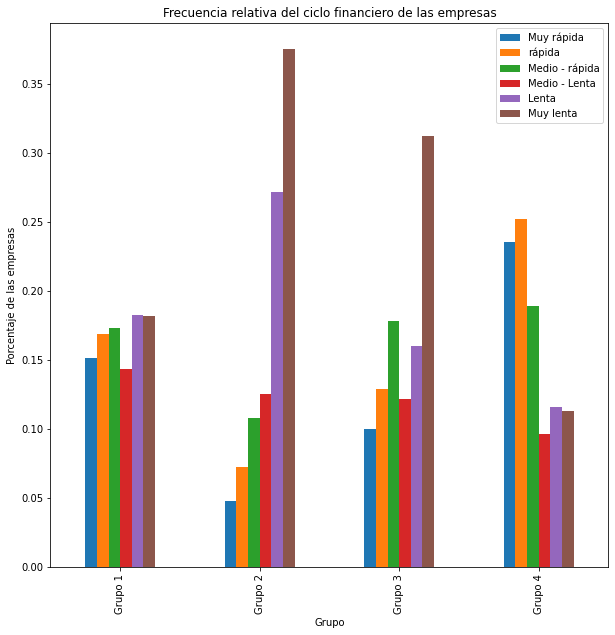

In [ ]:
ciclo_financiero_g1 = grupo0["ciclo_financiero"].value_counts().to_frame().sort_index()["ciclo_financiero"].tolist()
total_ciclo_financiero_g1 = sum(ciclo_financiero_g1)
ciclo_financiero_g1_porc = [valor / total_ciclo_financiero_g1 for valor in ciclo_financiero_g1]
ciclo_financiero_g1_porc = ["Grupo 1"] + ciclo_financiero_g1_porc

ciclo_financiero_g2 = grupo1["ciclo_financiero"].value_counts().to_frame().sort_index()["ciclo_financiero"].tolist()
total_ciclo_financiero_g2 = sum(ciclo_financiero_g2)
ciclo_financiero_g2_porc = [valor / total_ciclo_financiero_g2 for valor in ciclo_financiero_g2]
ciclo_financiero_g2_porc = ["Grupo 2"] + ciclo_financiero_g2_porc

ciclo_financiero_g3 = grupo2["ciclo_financiero"].value_counts().to_frame().sort_index()["ciclo_financiero"].tolist()
total_ciclo_financiero_g3 = sum(ciclo_financiero_g3)
ciclo_financiero_g3_porc = [valor / total_ciclo_financiero_g3 for valor in ciclo_financiero_g3]
ciclo_financiero_g3_porc = ["Grupo 3"] + ciclo_financiero_g3_porc

ciclo_financiero_g4 = grupo3["ciclo_financiero"].value_counts().to_frame().sort_index()["ciclo_financiero"].tolist()
total_ciclo_financiero_g4 = sum(ciclo_financiero_g4)
ciclo_financiero_g4_porc = [valor / total_ciclo_financiero_g4 for valor in ciclo_financiero_g4]
ciclo_financiero_g4_porc = ["Grupo 4"] + ciclo_financiero_g4_porc

df_ciclo_financiero = pd.DataFrame([ciclo_financiero_g1_porc, ciclo_financiero_g2_porc, ciclo_financiero_g3_porc, ciclo_financiero_g4_porc], columns=['Grupo', 'Muy rápida', 'rápida', 'Medio - rápida', 'Medio - Lenta', 'Lenta', 'Muy lenta'])
df_ciclo_financiero.plot(x='Grupo', ylabel='Porcentaje de las empresas', kind='bar', stacked=False, title='Frecuencia relativa del ciclo financiero de las empresas',figsize=(10,10)).legend(loc='best')